implementing the metropolis alg on the same example that they use in the 1953 paper

making some assumptions:
* particles can't leave a bounding box (let the bounding box be unit length)
* particles start in a random arrangement
* particles don't have a length or anything like that
* we will deal in 2d

In [56]:
%%capture
! pip install numpy
! pip install matplotlib

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
boltz: float = 1.38*(10**-23)
temp: float = 298
bbox: list[float] = [0.25, 0.25] # the bounding box, i can just change this and it will make the appropriate changes in the code
max_move: float = bbox[0]/20 #bbox/20 was what is used in the paper i think (0.05 bc they used unit length)

# 244 was the default used for the unit square in the paper
def generate_particle_set(n:int = 244) -> list[float]:
    
    return np.random.rand(n,2)*bbox


# idk if this is how they kept particles in bound in the paper but seems like a logical solution
# basically this just clips the new position so if it strays outside of the bounding box it just
# clips the value so its on the edge. there is probably a command like np.clip that i could have
# used instead but i've already written this
def in_bounds(position: list[float]) -> list[float]: 
    for i,coord in enumerate(position):
        if coord>1:
            position[i] = bbox[i]
        if coord<0:
            position[i] = 0 
    return position


def rand_move(position: tuple[float]) -> list[float]:
    new_pos: list = []
    for coord in position:
        new_pos.append(coord+max_move*((np.random.rand(1)[0]*2)-1))
    return in_bounds(new_pos)


# i don't think that this energy equation is right, this is just a stand in until i work out what it should be and how to optimise it
# i definitely probably shouldn't be using lenard jones potential here, this is an unreleased part of the paper need to read it more
# carefully find the right energy function
def calc_e(positions: list[int]) -> float:
    # Constants
    epsilon: float = 1.0  # Energy scale, units in eV (electron volts)
    sigma: float = 1.0    # Distance scale, units in angstroms
    
    total_energy: float = 0.0
    
    # Loop over all pairs of particles
    num_particles = len(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            # Calculate distance between particles i and j
            r = np.linalg.norm(np.array(positions[i]) - np.array(positions[j]))
            
            # Calculate Lennard-Jones potential
            v_ij = 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)
            
            # Add potential to total energy
            total_energy += v_ij
    
    return total_energy


def accept_move(new_positions: list[float], old_positions: list[float], index: int) -> list[float]:
    old_energy = calc_e(old_positions)
    new_energy = calc_e(new_positions)
    delta_e = new_energy - old_energy
    if delta_e>0:
        return True
    else:
        boltzmann_factor = np.exp(- delta_e / (boltz * temp))
        if np.random.rand() < boltzmann_factor:
            return True
        else:
            return False


def step_index(positions: list[float], i: int) -> list[float]:
    new_positions = positions
    new_positions[i] = rand_move(positions[i])
    return new_positions if accept_move(new_positions, positions, i) else positions


def metro_mcmc_step(old_positions: list[float]) -> list[float]:
    new_positions = old_positions
    for i in range(len(old_positions)):
        new_positions = step_index(new_positions, i)
    return new_positions


def plot_particles(positions: list[float]) -> None:
    plt.scatter(positions[:,0],positions[:,1], color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Particle Coordinates')
    plt.grid(True)
    plt.box(True)
    plt.xlim(0,bbox[0])
    plt.ylim(0,bbox[1])
    plt.show()
    return None


# the time complexity is terrible the energy function probably isn't even correct, needs some much better optimisation - maybe i
# could do more matrix maths to speed it up + recalcing all the energy equations each step should be unnecessary
particles = generate_particle_set(50)

step 0 complete
step 1 complete
step 2 complete
step 3 complete
step 4 complete
step 5 complete
step 6 complete
step 7 complete
step 8 complete
step 9 complete
step 10 complete
step 11 complete
step 12 complete
step 13 complete
step 14 complete
step 15 complete
step 16 complete
step 17 complete
step 18 complete
step 19 complete
step 20 complete
step 21 complete
step 22 complete
step 23 complete
step 24 complete
step 25 complete
step 26 complete
step 27 complete
step 28 complete
step 29 complete
step 30 complete
step 31 complete
step 32 complete
step 33 complete
step 34 complete
step 35 complete
step 36 complete
step 37 complete
step 38 complete
step 39 complete
step 40 complete
step 41 complete
step 42 complete
step 43 complete
step 44 complete
step 45 complete
step 46 complete
step 47 complete
step 48 complete
step 49 complete
step 50 complete
step 51 complete
step 52 complete
step 53 complete
step 54 complete
step 55 complete
step 56 complete
step 57 complete
step 58 complete
step 59

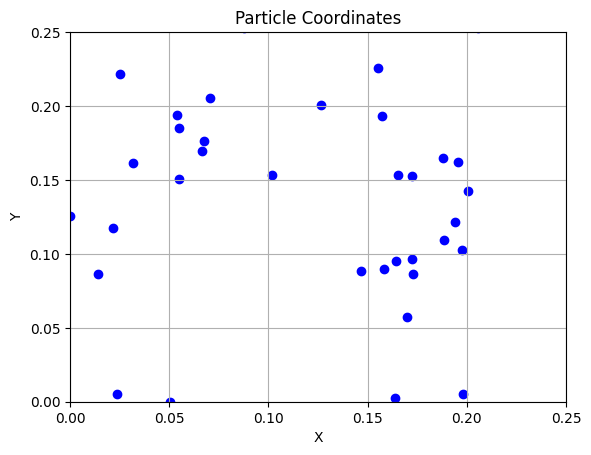

In [101]:
for i in range (200):
    particles = metro_mcmc_step(particles)
    print(f'step {i} complete')

plot_particles(particles)

this code does technically implement markov chain monte carlo only problem is the intractable function (so the energy function) that i am sampling from is almost definitely wrong in a few ways:
* the maths in general
* if not the maths then definitely the constants used
* the optimisation 

so i should probably work on making sure the function is correct and optimised by making better use of the built in numpy verctor/matrix maths stuff and not just dropping useful calculations out of the context window just to calc them again inside of the same markov step.

i mean i should probably have made this a class so that i could treat the whole particle spaces as an object as this makes more sense from a coding standpoint than what i have done. i should just written it so i could call this from outside of the class:

```python
particle = Particles(256, BBox)
for i in range(100):
    particle.mcmc_step()
    print(f'step {i} complete')
particle.plot()
```

although tbf what i have done isn't that much worse